# MSSW on weather evaluation

## Accept and preprocess the weather dataset

In [1]:
import csv

import numpy as np
import pandas as pd
import seaborn as sb

In [2]:
df = pd.read_csv("../Datasets_concept_drift/real_world_data/weather_dataset.csv")

X = df.drop(columns=['Unnamed: 0', 'Label_Rain'])
y = df["Label_Rain"]

X_ref = X[:6053]
X_test = X[6053:]
y_ref = y[:6053]
y_test = y[6053:]

X_ref = X_ref.to_numpy()
X_test = X_test.to_numpy()
y_ref = y_ref.to_numpy()
y_test = y_test.to_numpy()

print('\nreference data')
print(X_ref.shape)
print(X_ref)
print('\nreference labels')
print(y_ref.shape)
print('\ntesting data')
print(X_test.shape)
print(X_test)
print('\ntesting labels')
print(y_test.shape)


reference data
(6053, 8)
[[  24.7   21.3 1013.8 ...   12.    30.9   19.9]
 [  26.6   20.1 1015.7 ...   18.1   30.    19. ]
 [  24.    16.5 1018.6 ...   14.    28.9   19. ]
 ...
 [  76.    70.6 1017.4 ...    9.9   87.1   72. ]
 [  74.4   64.5 1019.  ...    8.    82.    66.9]
 [  73.9   65.3 1017.4 ...    7.    81.    66.9]]

reference labels
(6053,)

testing data
(12106, 8)
[[  73.    60.4 1018.  ...    9.9   82.9   61. ]
 [  74.5   62.3 1017.2 ...    8.9   91.    61. ]
 [  81.4   64.3 1012.7 ...   10.9   93.9   69.1]
 ...
 [  13.9    3.2 1009.6 ...   17.9   25.2    5.2]
 [   7.3   -7.5 1014.1 ...   24.9   23.2   -2.7]
 [  -2.1  -15.5 1025.4 ...   11.8   11.1  -10.8]]

testing labels
(12106,)


## Split the dataset to batches

### Yearly batches (size=365)

In [3]:
from eval_helpers import helpers

X_test_batches_year, y_test_batches_year = helpers.split_to_fixed_size_batches(X_test, y_test, batch_size=365)
X_ref_batches_year, y_ref_batches_year = helpers.split_to_fixed_size_batches(X_ref, y_ref, batch_size=365)

print('# yearly test batches:')
print(len(X_test_batches_year))
print(len(y_test_batches_year))
print('# yearly ref batches:')
print(len(X_ref_batches_year))
print(len(y_ref_batches_year))

chunk size 365
number of chunks 33
number of data 12106
shape of X that can be split perfectly (12045, 8)
number of resulting batches 33
[[  73.    60.4 1018.  ...    9.9   82.9   61. ]
 [  74.5   62.3 1017.2 ...    8.9   91.    61. ]
 [  81.4   64.3 1012.7 ...   10.9   93.9   69.1]
 ...
 [  70.5   60.2 1021.1 ...    8.9   78.8   62.6]
 [  70.3   63.7 1020.7 ...   11.1   82.4   62.6]
 [  74.2   65.3 1018.7 ...   25.1   84.2   64.4]]
(365, 8)
chunk size 365
number of chunks 16
number of data 6053
shape of X that can be split perfectly (5840, 8)
number of resulting batches 16
[[  24.7   21.3 1013.8 ...   12.    30.9   19.9]
 [  26.6   20.1 1015.7 ...   18.1   30.    19. ]
 [  24.    16.5 1018.6 ...   14.    28.9   19. ]
 ...
 [  30.5   20.9 1007.4 ...   18.1   37.    21. ]
 [  17.5    6.8 1024.2 ...   15.9   41.     5. ]
 [  33.6   22.5 1017.7 ...   10.1   55.9   19. ]]
(365, 8)
# yearly test batches:
33
33
# yearly ref batches:
16
16


### Montly batches (size=30)

In [4]:
X_test_batches_month, y_test_batches_month = helpers.split_to_fixed_size_batches(X_test, y_test, batch_size=30)
X_ref_batches_month, y_ref_batches_month = helpers.split_to_fixed_size_batches(X_ref, y_ref, batch_size=30)

print('# monthly test batches:')
print(len(X_test_batches_month))
print(len(y_test_batches_month))
print('# monthly ref batches:')
print(len(X_ref_batches_month))
print(len(y_ref_batches_month))

chunk size 30
number of chunks 403
number of data 12106
shape of X that can be split perfectly (12090, 8)
number of resulting batches 403
[[  73.    60.4 1018.    15.     3.9    9.9   82.9   61. ]
 [  74.5   62.3 1017.2   15.4    3.1    8.9   91.    61. ]
 [  81.4   64.3 1012.7   14.9    4.4   10.9   93.9   69.1]
 [  82.4   69.3 1010.1   14.7    5.7   12.8   96.1   70. ]
 [  86.6   71.5 1008.1   14.9    6.9   11.8  100.    75. ]
 [  85.5   71.9 1009.3   14.9    6.     9.9   96.1   77. ]
 [  77.6   73.6 1015.3   15.6    4.2   14.    90.    71.1]
 [  76.9   73.3 1018.4   12.     4.5    7.    82.    71.1]
 [  76.7   72.  1018.2    5.5    3.3    5.8   84.    72. ]
 [  76.7   65.7 1017.5   11.6    3.8   12.8   84.    68. ]
 [  66.2   59.3 1018.9   16.1    2.2    8.9   81.    60.1]
 [  58.5   55.  1021.8   11.5    4.     8.    66.9   55. ]
 [  62.6   54.8 1022.6   17.2    3.2    9.9   72.    53.1]
 [  63.7   59.5 1018.6   13.6    6.7   14.    71.1   60.1]
 [  68.5   66.8 1014.8    8.3    5.1

## Find suitable KMeans clustering parameters

In [5]:
from core import mssw_preprocessing
from eval_helpers import kmeans_verbose_helpers

weighted_joined_reference_data, _, _ = mssw_preprocessing.mssw_preprocess(X_ref_batches_year, X_test_batches_year)

filename = 'weather_yearly_output.txt'
print(kmeans_verbose_helpers)
kmeans_verbose_helpers.write_verbose_kmeans_to_file(filename, weighted_joined_reference_data,
                                                    n_clusters=2, n_init=100, max_iter=500, tol=0, random_state=1053)
output_dicts = kmeans_verbose_helpers.convert_kmeans_output_file_to_dicts(filename, n_init=100)
kmeans_verbose_helpers.print_stats_from_kmeans_output_dicts(output_dicts)

something
<module 'eval_helpers.kmeans_verbose_helpers' from 'C:\\Users\\jpohl\\PycharmProjects\\clustering-drift-detection\\mssw\\eval_helpers\\kmeans_verbose_helpers.py'>
random state: 1053
total number of results: 100
maximum number of iterations: 13
minimum initial inertia: 8.509178613743531
maximum initial inertia: 26.258506798839463
number of unique final inertia values: 1
minimum final inertia: 7.183068373104633
maximum final inertia: 7.183068373104633
total number of convergences: 100
number of strict convergences: 100
number of tol-based convergences: 0


## Try different numbers of clusters

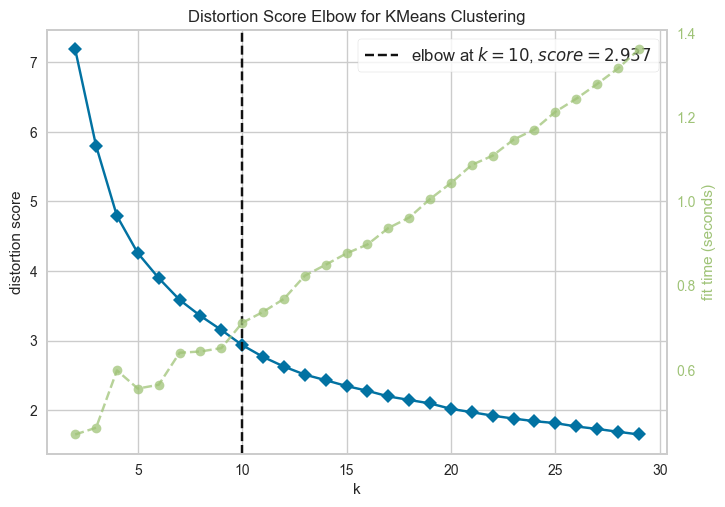

KElbowVisualizer(ax=<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(max_iter=10000, n_clusters=29, n_init=100,
                                  random_state=0, tol=0),
                 k=(2, 30))

In [6]:
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.datasets.loaders import load_nfl
from sklearn.cluster import KMeans


kmeans = KMeans(
    n_init=100,
    max_iter=10000,
    tol=0,
    random_state=0
)

kelbow_visualizer(kmeans, weighted_joined_reference_data, k=(2, 30))


## Yearly predictions - drift detection evaluation

### Read the defined yearly drift locations

In [7]:
import csv

true_drift_bool_year = []
with open('../Datasets_concept_drift/real_world_data_drifts/weather/weather_yearly_drifts.csv') as f:
    rdr = csv.reader(f, delimiter=',')
    for row in rdr:
        true_drift_bool_year.append(row)
    true_drift_bool_year = true_drift_bool_year[0] # only one row of important data
    true_drift_bool_year = [b == 'True' for b in true_drift_bool_year]
print(true_drift_bool_year)

[False, True, True, True, False, True, False, False, False, False, True, True, False, False, True, True, True, True, False, False, False, True, False, True, True, False, True, True, True, False, False, True, True]


### Use them for the evaluation

In [8]:
from eval_helpers import mssw_eval_real_world

_, fpr_mean, _, det_acc_mean, _ = mssw_eval_real_world.all_drifting_batches_randomness_robust(
    reference_data_batches=X_ref_batches_year,
    testing_data_batches=X_test_batches_year,
    true_drift_bool=true_drift_bool_year,
    n_clusters=10, n_init=100, max_iter=130, tol=0,
    coeff=2.66, first_random_state=0,
    min_runs=2, std_err_threshold=0.05
)

print('yearly mean FPR:', fpr_mean)
print('yearly mean detection accuracy:', det_acc_mean)


min_runs 2


C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\core\mssw.py:66: RuntimeWarning: invalid value encountered in divide
  Av_c = np.divide(centroid_distance_sums, num_points_in_clusters)


[True, False, False, False, False, False, True, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False]
[False, True, True, True, False, True, False, False, False, False, True, True, False, False, True, True, True, True, False, False, False, True, False, True, True, False, True, True, True, False, False, True, True]
[True, False, False, False, False, False, True, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False]
[False, True, True, True, False, True, False, False, False, False, True, True, False, False, True, True, True, True, False, False, False, True, False, True, True, False, True, True, True, False, False, True, True]
yearly mean FPR: 0.26666666666666666
yearly mean detection accuracy: 0.1111111111111111


C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\core\mssw.py:66: RuntimeWarning: invalid value encountered in divide
  Av_c = np.divide(centroid_distance_sums, num_points_in_clusters)


### Inspect MSSW to obtain meaning

In [9]:
n_clusters=10

In [14]:
from core import mssw
import importlib
importlib.reload(mssw)
from matplotlib import pyplot as plt


drifts_detected, LCL_Av_s, UCL_Av_s, all_av_c, all_av_sr, all_cluster_num_points = \
    mssw.all_drifting_batches_return_plot_data(
        X_ref_batches_year,
        X_test_batches_year,
        n_clusters=n_clusters,
        n_init=100,
        max_iter=130,
        tol=0
    )

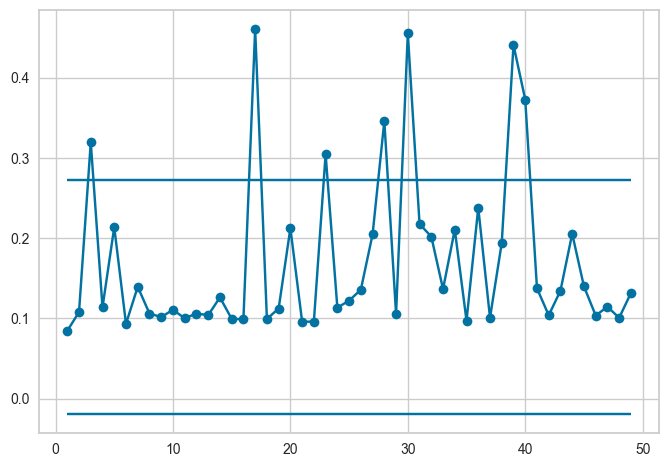

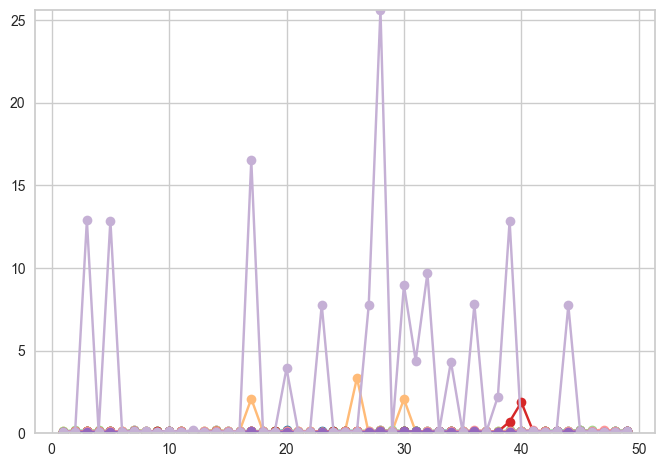

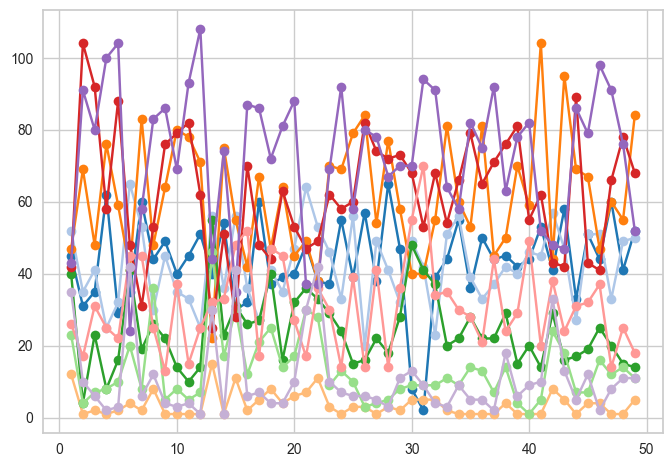

In [16]:
ymin = np.min(all_av_c)
ymax = np.max(all_av_c)
total_num_batches = len(X_ref_batches_year) + len(X_test_batches_year)

# https://matplotlib.org/2.1.1/gallery/showcase/bachelors_degrees_by_gender.html#sphx-glr-gallery-showcase-bachelors-degrees-by-gender-py
colors = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
          '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
          '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
          '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']

plt.plot(range(1, total_num_batches + 1), all_av_sr[0], 'o-')
plt.hlines(UCL_Av_s, 1, total_num_batches)
plt.hlines(LCL_Av_s, 1, total_num_batches)
# plt.ylim((ymin, ymax))
plt.show()

for i in range(n_clusters):
    plt.plot(range(1, total_num_batches + 1), all_av_c[i],
             color=colors[i], marker='o')
plt.ylim((ymin, ymax))
plt.show()

for i in range(n_clusters):
    plt.plot(range(1, total_num_batches + 1), all_cluster_num_points[i],
             color=colors[i], marker='o')
plt.show()

## Monthly predictions - drift detection evaluation

### Read the defined monthly drift locations

In [17]:
import csv

true_drift_bool_month = []
with open('../Datasets_concept_drift/real_world_data_drifts/weather/weather_monthly_drifts.csv') as f:
    rdr = csv.reader(f, delimiter=',')
    for row in rdr:
        true_drift_bool_month.append(row)
    true_drift_bool_month = true_drift_bool_month[0] # only one row of important data
    true_drift_bool_month = [b == 'True' for b in true_drift_bool_month]
print(true_drift_bool_month)

[False, False, False, False, False, False, False, False, False, False, True, True, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, Fal

### Use them for the evaluation

In [18]:
from eval_helpers import mssw_eval_real_world

_, fpr_mean, _, det_acc_mean, _ = mssw_eval_real_world.all_drifting_batches_randomness_robust(
    reference_data_batches=X_ref_batches_month,
    testing_data_batches=X_test_batches_month,
    true_drift_bool=true_drift_bool_month,
    n_clusters=10, n_init=100, max_iter=90, tol=0,
    coeff=2.66, first_random_state=0,
    min_runs=2, std_err_threshold=0.05
)

print('monthly mean FPR:', fpr_mean)
print('monthly mean detection accuracy:', det_acc_mean)

min_runs 2
[False, False, False, False, False, True, True, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False

In [20]:
n_clusters=10

In [22]:
from core import mssw
import importlib
importlib.reload(mssw)
from matplotlib import pyplot as plt


drifts_detected, LCL_Av_s, UCL_Av_s, all_av_c, all_av_sr, all_cluster_num_points = \
    mssw.all_drifting_batches_return_plot_data(
        X_ref_batches_month,
        X_test_batches_month,
        n_clusters=n_clusters,
        n_init=100,
        max_iter=1000,
        tol=0
    )

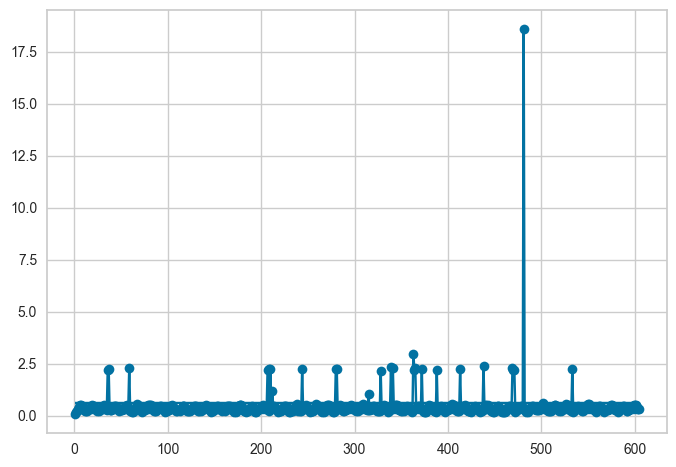

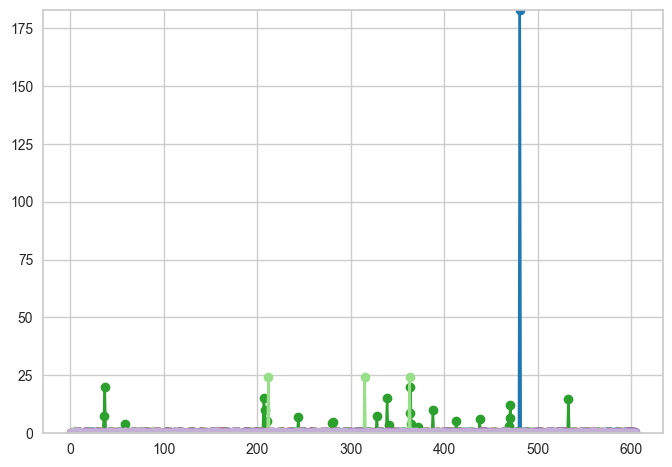

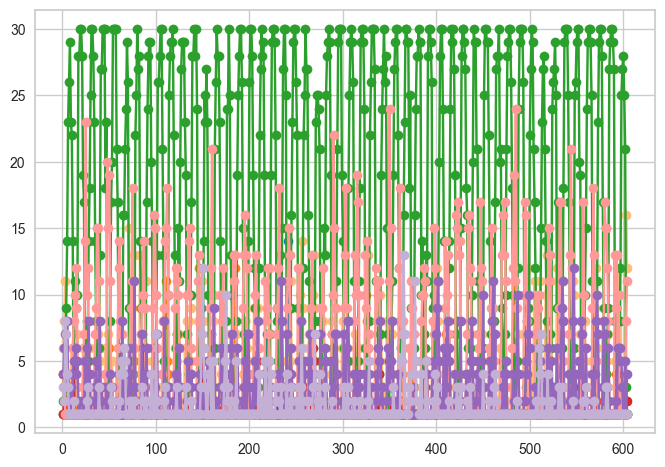

In [23]:
ymin = np.min(all_av_c)
ymax = np.max(all_av_c)
total_num_batches = len(X_ref_batches_month) + len(X_test_batches_month)

# https://matplotlib.org/2.1.1/gallery/showcase/bachelors_degrees_by_gender.html#sphx-glr-gallery-showcase-bachelors-degrees-by-gender-py
colors = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
          '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
          '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
          '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']

plt.plot(range(1, total_num_batches + 1), all_av_sr[0], 'o-')
plt.hlines(UCL_Av_s, 1, total_num_batches)
plt.hlines(LCL_Av_s, 1, total_num_batches)
# plt.ylim((ymin, ymax))
plt.show()

for i in range(n_clusters):
    plt.plot(range(1, total_num_batches + 1), all_av_c[i],
             color=colors[i], marker='o')
plt.ylim((ymin, ymax))
plt.show()

for i in range(n_clusters):
    plt.plot(range(1, total_num_batches + 1), all_cluster_num_points[i],
             color=colors[i], marker='o')
plt.show()